In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

from sqlalchemy import create_engine

In [2]:
engine = create_engine('postgresql://localhost:5432/postgres')
connection = engine.connect()

In [19]:
# data = engine.execute("SELECT salary FROM salaries limit 1000")
# data = [d for d in data]
# for record in data:
#     print(record)

data_db = pd.read_sql("SELECT * FROM salaries", connection)
data_db.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


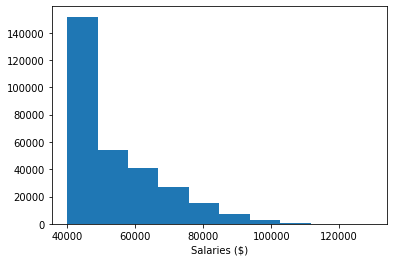

In [20]:
salary = data_db["salary"]
plt.hist(salary)
plt.xlabel('Salaries ($)')
plt.savefig("salary_counts.png")
plt.show()

In [21]:
data_db2 = pd.read_sql("SELECT * FROM employees", connection)
data_db2.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [23]:
data_db3 = pd.read_sql("SELECT * FROM titles", connection)
data_db3.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [25]:
data_df = pd.merge(data_db, data_db2, on="emp_no")
data_df.head()

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [26]:
data_df = data_df.rename(columns={"emp_title_id":"title_id"})
data_df.head()

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [27]:
data_df = pd.merge(data_df, data_db3, on="title_id")
data_df.head()

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer


In [28]:
avg_sal_bt = data_df.groupby("title").mean()["salary"]
avg_sal_bt

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

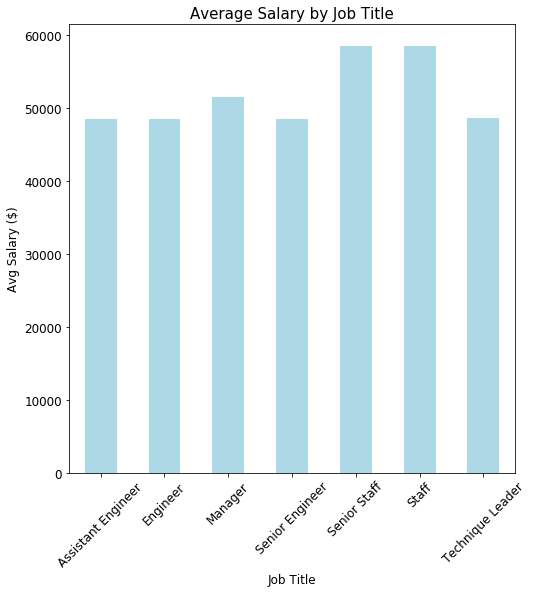

In [37]:
plt.figure(figsize=(8,8.25))
avg_sal_bt.plot(kind="bar", facecolor="lightblue", rot=45, fontsize=12)
plt.title("Average Salary by Job Title", fontsize=15)
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Avg Salary ($)", fontsize=12)
plt.savefig("avg_salary.png")
plt.show()